### `Background and Context`

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.


### `Objective`

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


### `Data Description`

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


### `Data Dictionary`

•	RowNumber: Row number                                                                  
•	CustomerId: Unique identification key for different customers.                                     
•	Surname: Surname of the customer                                                            
•	Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.                                                                                          
•	Geography: The country to which the customer belongs.                                                    
•	Gender: The gender of the customer.                                                                        
•	Age: Age of the customer.                                                                                  
•	Tenure: The period of time a customer has been associated with the bank.                               
•	Balance: The account balance (the amount of money deposited in the bank account) of the customer.      
•	NumOfProducts: How many accounts, bank account affiliated products the person has.                        
•	HasCrCard: Does the customer have a credit card through the bank?                          
•	IsActiveMember: Subjective, but for the concept                                                    
•	EstimatedSalary: Estimated salary of the customer.                                                  
•	Exited: Did they leave the bank after all?                                    


In [8]:
!pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=e049053de9ee5ee71b0b2d1515906600c9440c84fa034b0602ea3528c9a113ac
  Stored in directory: c:\users\vsudh\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=21a3f044c831bcb82b54afae2766576dd3b5339ce38e5093866e56e6d1950e11
  Stored in directory: c:\users\vsudh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


# Import the dataset

In [18]:
data=pd.read_csv('bank.csv')
df_bank=data.copy()

# Checking the initial observations

In [19]:
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Getting basic details about dataset

In [20]:
df_bank.shape

(10000, 14)

In [21]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df_bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Points to be Noted:

- The dataset has 10000 rows and 14 columns.
- 9 variables have the data type int64, 3 variables are object and the rest float64.
- There are no null values in this dataset.

In [23]:
#Number of distinct categories in variable 'Exited'
df_bank['Exited'].nunique()

2

* We have 2 categories, 1 or 0.

In [24]:
#checking the percentage of each class in the dataset
(df_bank.Exited.value_counts())/(df_bank.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* I think the distribution looks decent with 20% exited and 80% still with the bank.

# Checking for Duplicates

In [25]:
#just some basic preprocessing
df_bank.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Dropping variables 'RowNumber', 'Surname' and 'CustomerId' which is not useful for us

In [26]:
df_bank_new = df_bank.drop(['RowNumber','CustomerId','Surname'],axis=1) 

- These 3 variables act as unique identifiers for each of our customer. But for our purposes of model building we are going to read in the characteristics of each customer and give an output. So we do not need these variables.

# Variable Type Adjustment

### Converting some categorical columns into numerical

In [27]:
#creating dummy variables for the categorical features
df_bank_new = pd.get_dummies(df_bank_new,drop_first=True)
df_bank_new = df_bank_new.astype('float32')
df_bank_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,0.0,0.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,1.0,0.0,1.0


# Summary of the variables

In [28]:
df_bank_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528809,96.653336,350.00,584.000000,652.000000,718.000000,850.000000
Age,10000.0,38.921799,10.487961,18.00,32.000000,37.000000,44.000000,92.000000
Tenure,10000.0,5.012800,2.892165,0.00,3.000000,5.000000,7.000000,10.000000
Balance,10000.0,76485.781250,62398.953125,0.00,0.000000,97198.539062,127644.238281,250898.093750
NumOfProducts,10000.0,1.530200,0.581636,1.00,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,0.705500,0.455811,0.00,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,0.515100,0.499803,0.00,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,100090.125000,57510.468750,11.58,51002.109375,100193.914062,149388.253906,199992.484375
Exited,10000.0,0.203700,0.402771,0.00,0.000000,0.000000,0.000000,1.000000
Geography_Germany,10000.0,0.250900,0.433565,0.00,0.000000,0.000000,1.000000,1.000000


# Exploratory Data Analysis

### Bivariate Analysis

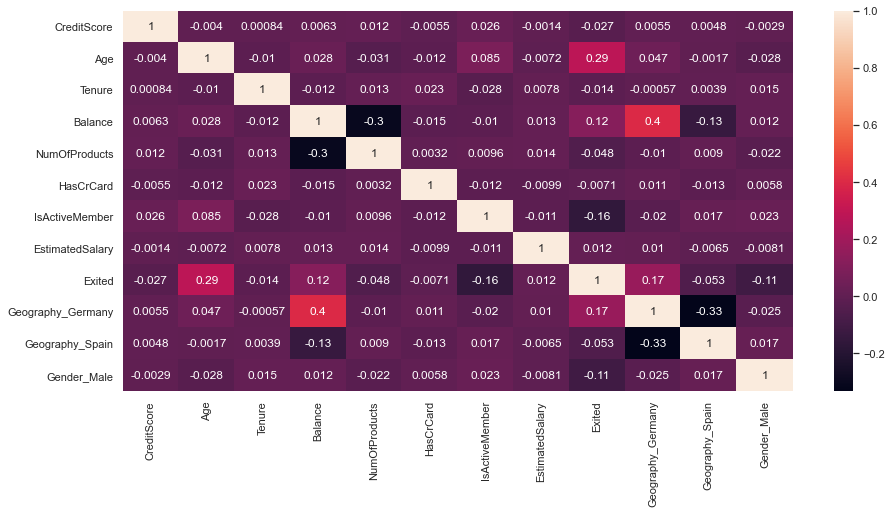

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(df_bank_new.corr(),annot=True)
plt.show()

- Age and our target variables Exited seem to have very strong relation. Possibly as Age goes up, users start moving to other banks or they are passing away.
- Balance and Geography also seem to have strong relation.

# Box plots for these interval variables

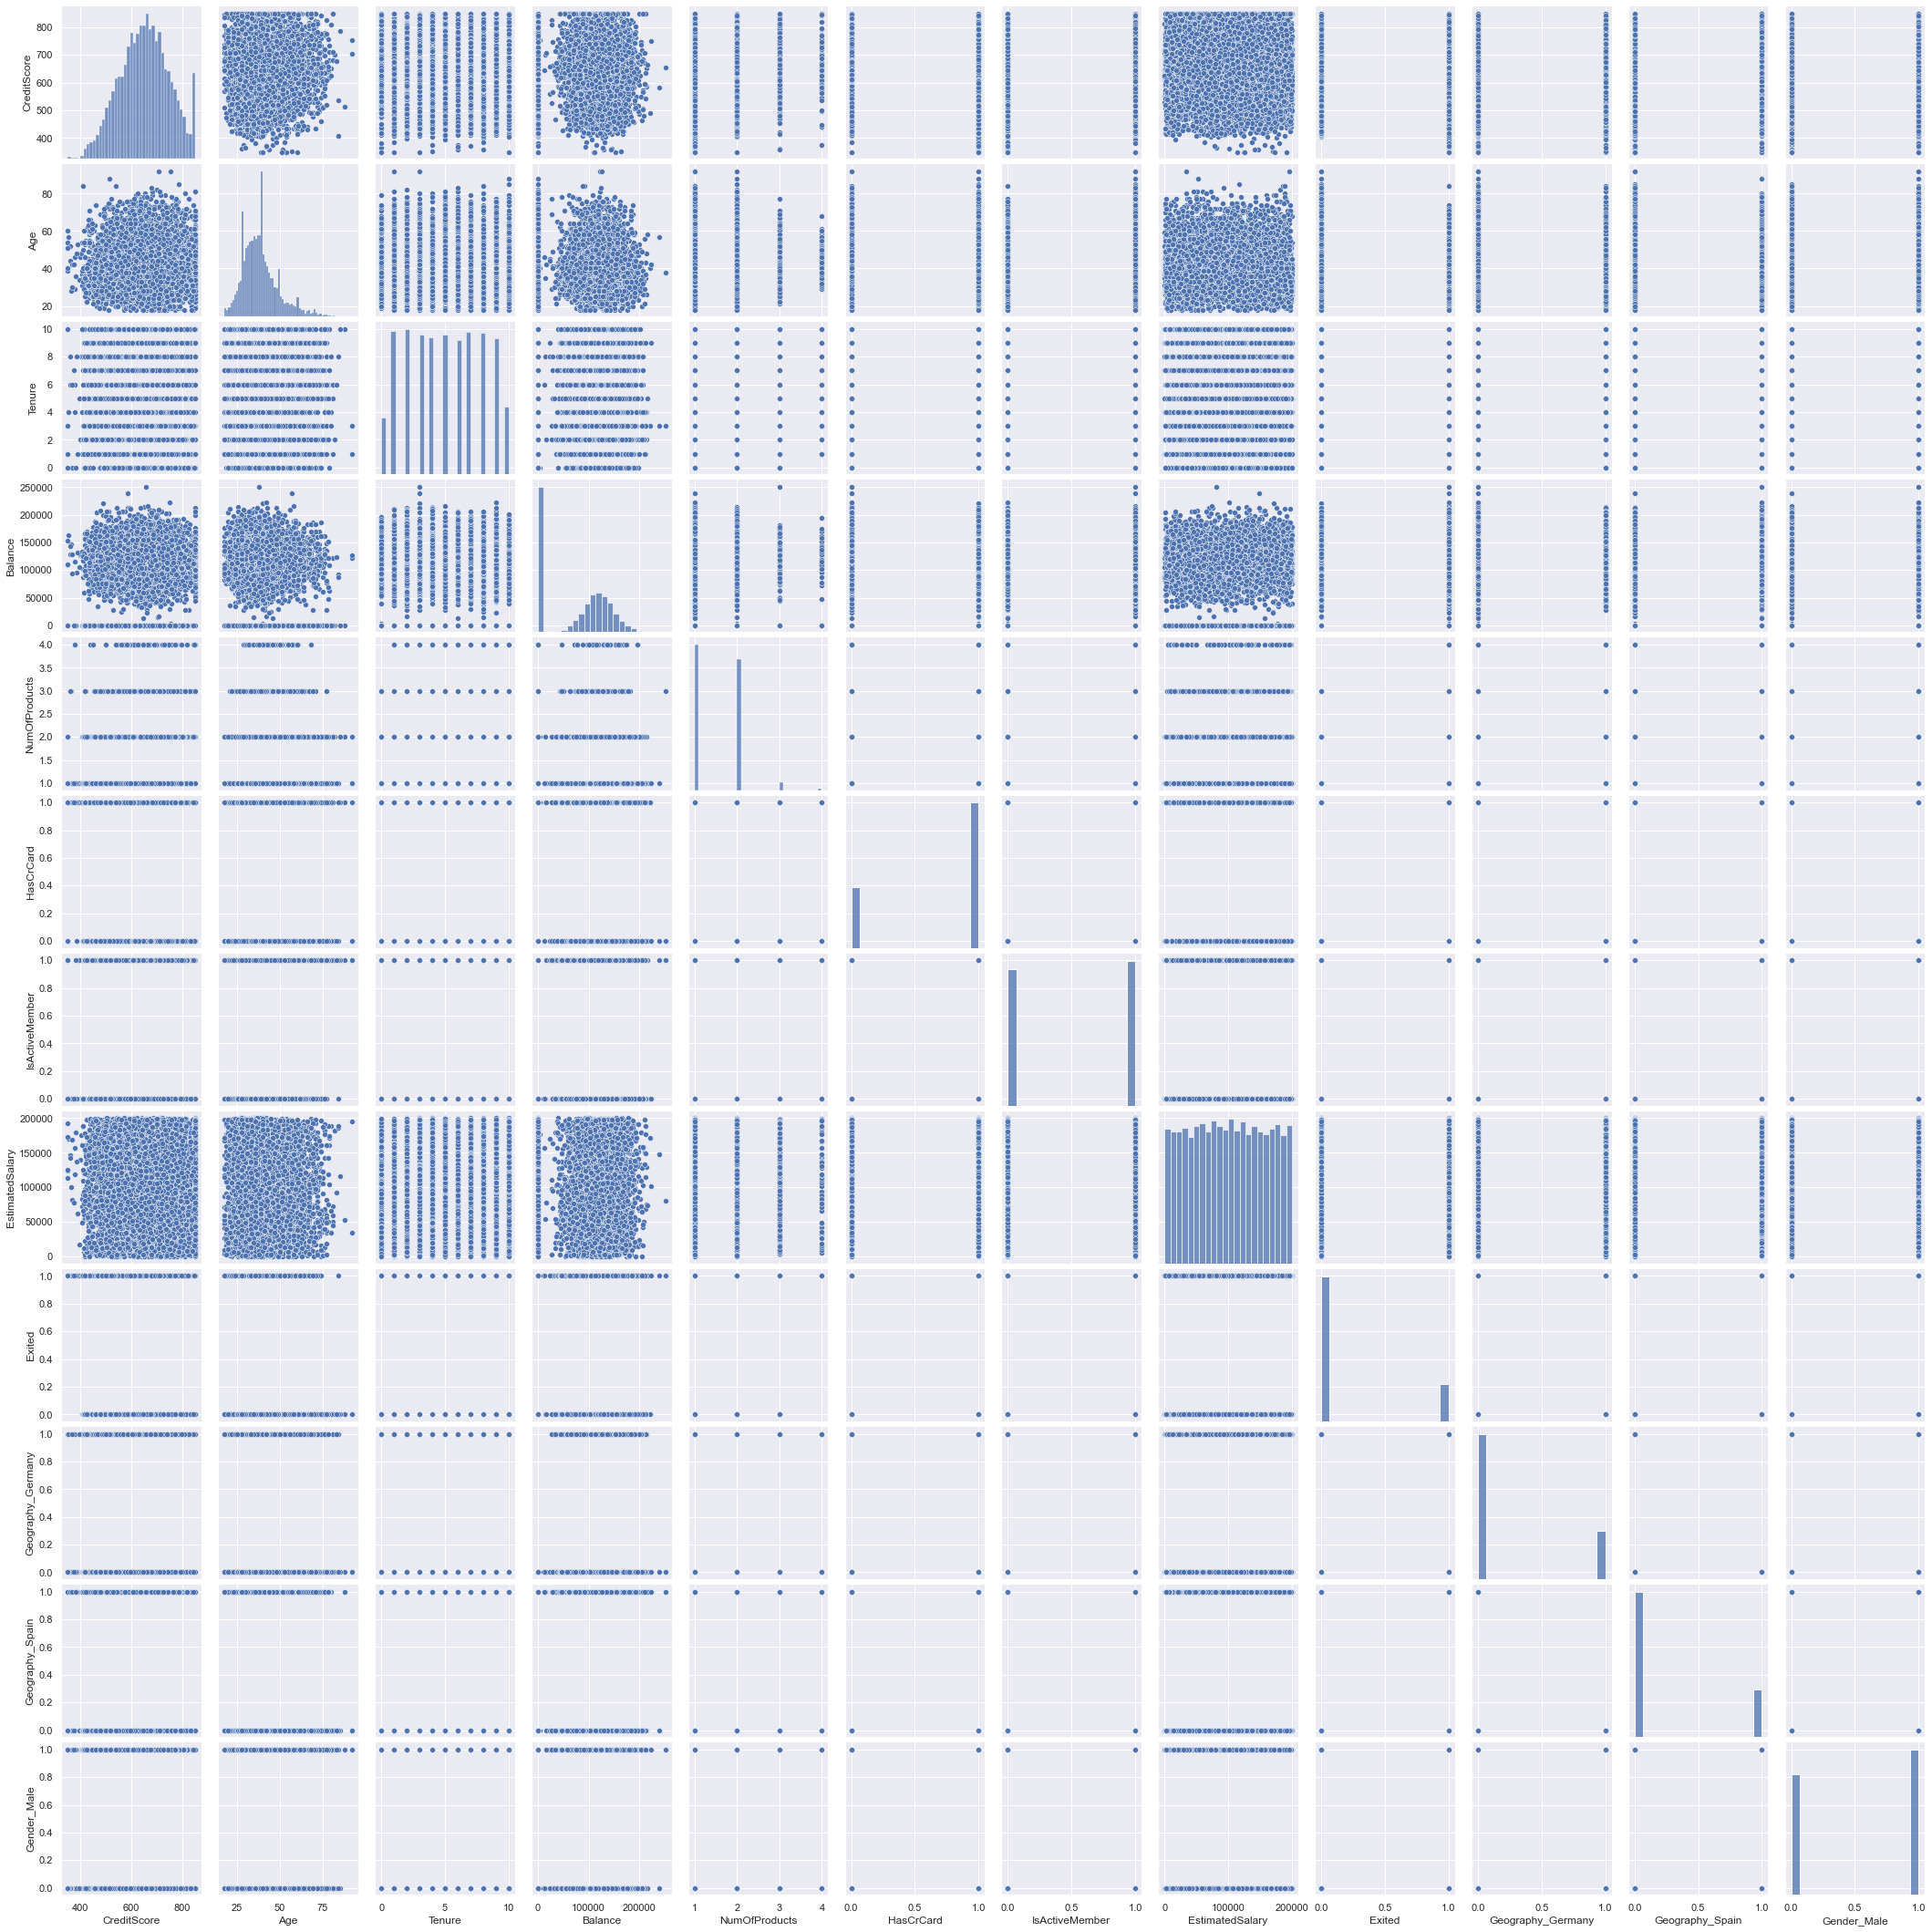

In [30]:
sns.pairplot(data=df_bank_new)
plt.show()

### Exited vs CreditScore

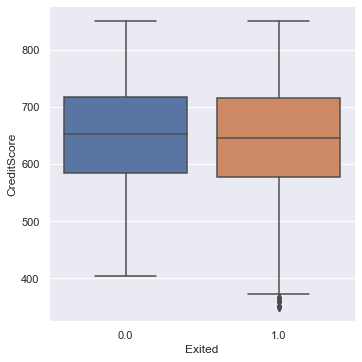

In [32]:
sns.catplot(x="Exited", y="CreditScore", kind="box", data=df_bank_new)

- Most of the users seem to fall in the range of 600-720 credit score. Both Churned and Non-Churned customers. There are a very few outliers in the users who have churned. These outliers seem to have very low credit score. This may be a good thing for the company.

### Exited vs Age

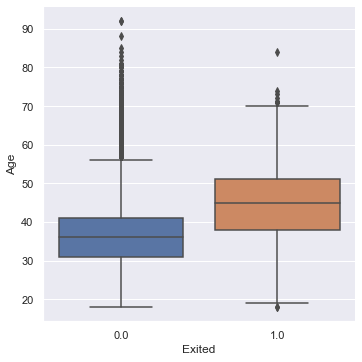

In [33]:
sns.catplot(x="Exited", y="Age", kind="box", data=df_bank_new)

- Most of our churned users seem to fall in the 40-50 age category while existing customers seem to be in 30-45.
- There are a lot of existing customers who are above the age of 65.
- Possible that our bank caters more towards younger population, may be more tech savvy users.

### Exited vs Tenure

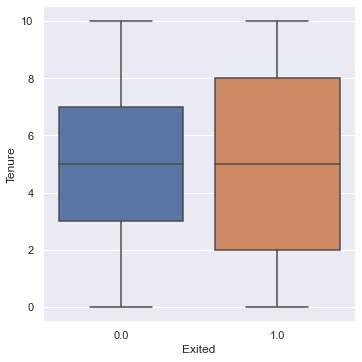

In [34]:
sns.catplot(x="Exited", y="Tenure", kind="box", data=df_bank_new)

- Most of our churned users seem to be a broader set of users. Tenure from 2 years to 8 years.
- While the existing customers are 3-6.5 years.
- No outliers here. 
- No specific insight here. The data doesn't seem to be clear.

### Exited vs Balance

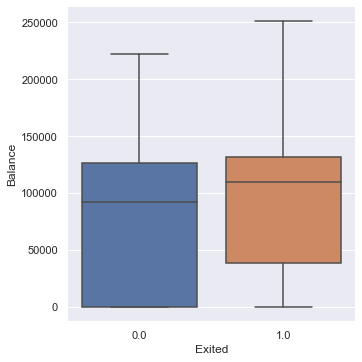

In [35]:
sns.catplot(x="Exited", y="Balance", kind="box", data=df_bank_new)

- Our existing customers seem to have low balances as compared to churned users. As low as 0.
- The minimum balance of churned user seems to be 47000 or so.

### Exited vs NumOfProducts

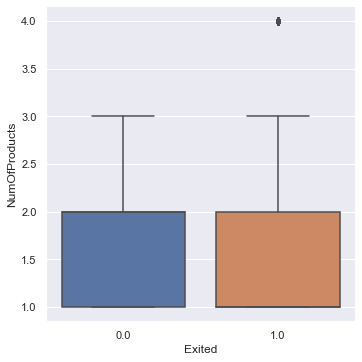

In [36]:
sns.catplot(x="Exited", y="NumOfProducts", kind="box", data=df_bank_new)

- For both of our users, most of them seem to have 1 or 2 products with us. Looks like 1 single outlier with 4 products who exited the bank.

### Exited vs EstimatedSalary

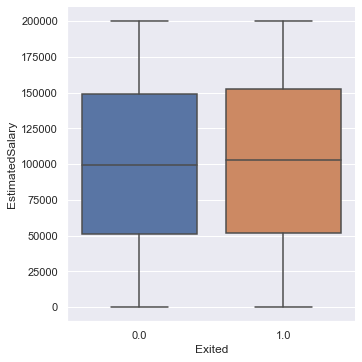

In [38]:
sns.catplot(x="Exited", y="EstimatedSalary", kind="box", data=df_bank_new)

- The average salary seems to be almost the same for both set of users here.
- Not much insight here.

In [39]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df_bank_new['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_bank_new['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Exited vs HasCrCard

Exited      0.0   1.0    All
HasCrCard                   
0.0        2332   613   2945
1.0        5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


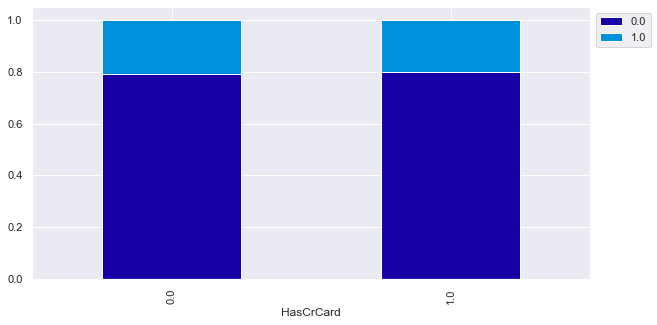

In [41]:
stacked_plot(df_bank_new['HasCrCard'])

### Exited vs IsActiveMember

Exited           0.0   1.0    All
IsActiveMember                   
0.0             3547  1302   4849
1.0             4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


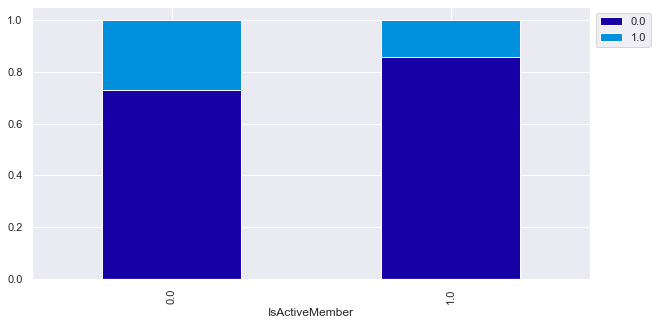

In [42]:
stacked_plot(df_bank_new['IsActiveMember'])

- For both of these variables, there is nothing significant to note here.

## Broad Customer Profiles:

#### Churned Customer - Average Credit Score, higher Age, Higher Tenure, slightly higher balance
#### Existing Customer - Average Credit Score, lower Age, lower Tenure, slightly lower balance

# Data Preparation

### Separating the features

In [57]:
#getting the features and labels and finally splitting the test and train data.

X = df_bank_new[['CreditScore','Geography_Germany','Geography_Spain','Gender_Male','Age','Tenure','Balance','NumOfProducts','HasCrCard',
                 'IsActiveMember','EstimatedSalary']]
Y = df_bank_new['Exited']

In [58]:
#Standardizing the columns
from sklearn.preprocessing import StandardScaler
X['CreditScoreNorm'] = StandardScaler().fit_transform(X['CreditScore'].values.reshape(-1,1))
X= X.drop(['CreditScore'],axis=1)

X['AgeNorm'] = StandardScaler().fit_transform(X['Age'].values.reshape(-1,1))
X= X.drop(['Age'],axis=1)

X['TenureNorm'] = StandardScaler().fit_transform(X['Tenure'].values.reshape(-1,1))
X= X.drop(['Tenure'],axis=1)

X['BalanceNorm'] = StandardScaler().fit_transform(X['Balance'].values.reshape(-1,1))
X= X.drop(['Balance'],axis=1)

X['NumOfProductsNorm'] = StandardScaler().fit_transform(X['NumOfProducts'].values.reshape(-1,1))
X= X.drop(['NumOfProducts'],axis=1)

X['EstimatedSalaryNorm'] = StandardScaler().fit_transform(X['EstimatedSalary'].values.reshape(-1,1))
X= X.drop(['EstimatedSalary'],axis=1)

In [59]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### Neural Network

In [61]:
#initialize the model
model = Sequential()

## Deep neural network

Model-1 

- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each customer, ie each line with 11 columns from the dataset. For each row, the final layer will output a probability distribution (sigmoid activation function) and classify either as churned or not.

- a dropout step is included to prevent overfitting.

### Adding layers [layers and activations]

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added


In [62]:

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))           

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated


In [63]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
______________________________________________________

## Training [Forward pass and Backpropagation]

Training the model

In [65]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 15s 2ms/step - loss: 0.5224 - accuracy: 0.7977 - val_loss: 0.4404 - val_accuracy: 0.8094
Epoch 2/10
427/427 [==============================] - 0s 798us/step - loss: 0.4483 - accuracy: 0.7982 - val_loss: 0.4068 - val_accuracy: 0.8181
Epoch 3/10
427/427 [==============================] - 0s 812us/step - loss: 0.4163 - accuracy: 0.8229 - val_loss: 0.3869 - val_accuracy: 0.8462
Epoch 4/10
427/427 [==============================] - 0s 799us/step - loss: 0.3893 - accuracy: 0.8343 - val_loss: 0.3702 - val_accuracy: 0.8500
Epoch 5/10
427/427 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8404 - val_loss: 0.3650 - val_accuracy: 0.8525
Epoch 6/10
427/427 [==============================] - 0s 820us/step - loss: 0.3672 - accuracy: 0.8488 - val_loss: 0.3724 - val_accuracy: 0.8587
Epoch 7/10
427/427 [==============================] - 0s 885us/step - loss: 0.3738 - accuracy: 0.8430 - val_loss: 0.3564 - val_accuracy: 0.

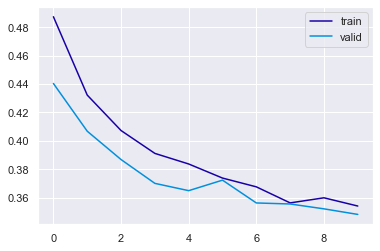

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


### Evaluating the model

In [67]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 788us/step - loss: 0.3498 - accuracy: 0.8540


- Given that our target variable has fairly decent amount of data about churned customers, 85% accuracy seems to be a good performace.

In [68]:
print(score)

[0.34976285696029663, 0.8539999723434448]


In [70]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

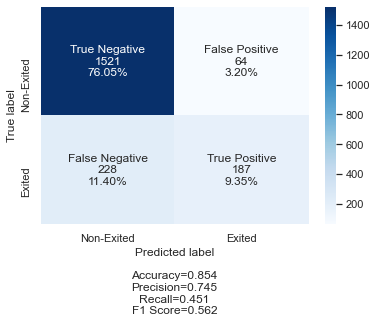

In [71]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Non-Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Although the accuracy seems to be decent enough, the precision and recall metrics seem pretty low.
- There are a total of 228 customers who are still not being identified (False Negative).
- We definitely need to work on improving this model.

### Attempting to improve the model with different approaches

In [77]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_dim=11, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))


Model2.compile(optimizer= "Adam", loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
10/10 [==============================] - 1s 29ms/step - loss: 1.0822 - accuracy: 0.5445 - val_loss: 0.5977 - val_accuracy: 0.7506
Epoch 2/40
10/10 [==============================] - 0s 4ms/step - loss: 0.8306 - accuracy: 0.6853 - val_loss: 0.5575 - val_accuracy: 0.7950
Epoch 3/40
10/10 [==============================] - 0s 4ms/step - loss: 0.7450 - accuracy: 0.7319 - val_loss: 0.5138 - val_accuracy: 0.7944
Epoch 4/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.7342 - val_loss: 0.4912 - val_accuracy: 0.7850
Epoch 5/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.7293 - val_loss: 0.4824 - val_accuracy: 0.7781
Epoch 6/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.7312 - val_loss: 0.4755 - val_accuracy: 0.7775
Epoch 7/40
10/10 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.7443 - val_loss: 0.4674 - val_accuracy: 0.7837
Epoch 8/40
10/10 [=

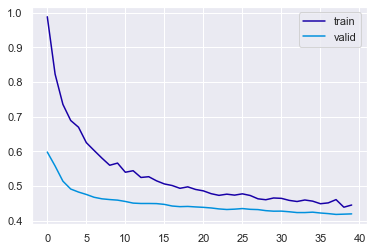

In [78]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


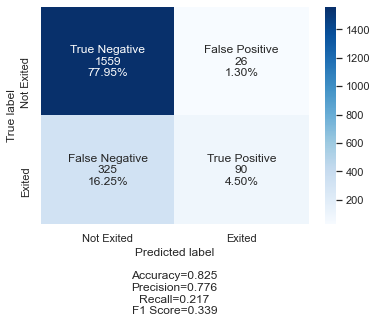

In [79]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Conclusion:**

As you can see here the Recall of the model is not improved and it is worse than the Previous ANN model but the precision is slightly changed.

Let's try weighted loss for imbalance dataset

In [80]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

C:\Users\vsudh\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[0. 1.], y=[0. 0. 1. ... 1. 0. 1.] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{0: 0.6271558482282847, 1: 2.466091245376079}

In [81]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/5
534/534 [==============================] - 1s 687us/step - loss: 0.4891 - accuracy: 0.7988
Epoch 2/5
534/534 [==============================] - 0s 693us/step - loss: 0.4783 - accuracy: 0.7824
Epoch 3/5
534/534 [==============================] - 0s 765us/step - loss: 0.4730 - accuracy: 0.7956
Epoch 4/5
534/534 [==============================] - 0s 851us/step - loss: 0.4864 - accuracy: 0.7837
Epoch 5/5
534/534 [==============================] - 0s 720us/step - loss: 0.4650 - accuracy: 0.7884


In [82]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 563us/step - loss: 0.4827 - accuracy: 0.7915


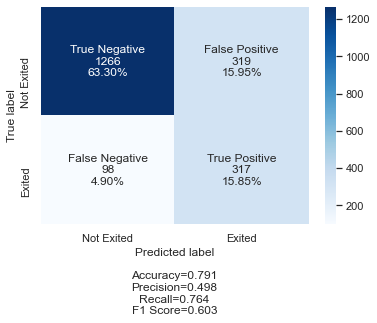

In [83]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

 
 **Conclusion:** 


 As you can see here the Recall is increased but the precision is very bad with the last model. There is scope for imporvements for our models because we want Recall, Precision and Accuracy to be good.

1) Threshold can be tuned to get the optimal value

2) Resampling techniques can be applied to balanced the data and then train the model

3) Hyperparameter tuning can be applied to tune the different Hyperparameters


I would like to go with 1st model based on our numbers here.